# K-Means Clustring Example
# K-means comes under unsupervied Machine Learning Technique
## Terms we will use here like **Cluster**, **Centroid**
## Cluster: we will partition our dataset into K distinct cluster
## Centroid: nearest mean cluster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
X = np.array([
    [7.5, 8.0],
    [9.0, 7.0],
    [10.5, 6.5],
    [6.0, 9.0],
    [13.0, 5.5],
    [8.0, 8.5],
    [14.0, 4.5],
    [9.5, 7.0],
    [7.0, 9.0],
    [12.0, 6.0]
])
df = pd.DataFrame(X, columns=['EntryTime','Duration'])
df

,EntryTime,Duration
0,7.5,8.0
1,9.0,7.0
2,10.5,6.5
3,6.0,9.0
4,13.0,5.5
5,8.0,8.5
6,14.0,4.5
7,9.5,7.0
8,7.0,9.0
9,12.0,6.0


In [4]:
#create model
model = KMeans(n_clusters=3, random_state=0)

In [6]:
df['Cluster'] = model.fit_predict(df[['EntryTime','Duration']])
centers = model.cluster_centers_
df

C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,EntryTime,Duration,Cluster
0,7.5,8.0,0
1,9.0,7.0,2
2,10.5,6.5,2
3,6.0,9.0,0
4,13.0,5.5,1
5,8.0,8.5,0
6,14.0,4.5,1
7,9.5,7.0,2
8,7.0,9.0,0
9,12.0,6.0,1


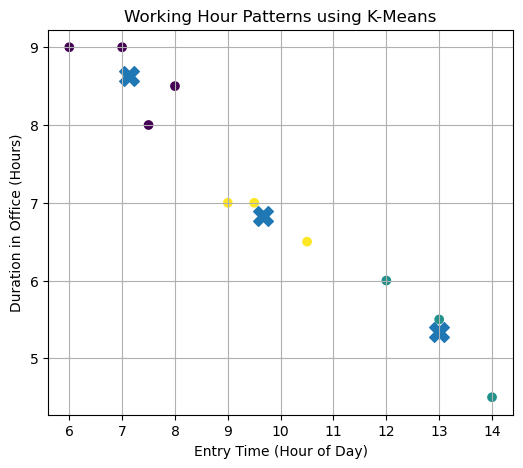

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(df['EntryTime'], df['Duration'], c=df['Cluster'])
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
plt.xlabel('Entry Time (Hour of Day)')
plt.ylabel('Duration in Office (Hours)')
plt.title('Working Hour Patterns using K-Means')
plt.grid(True)
plt.show()

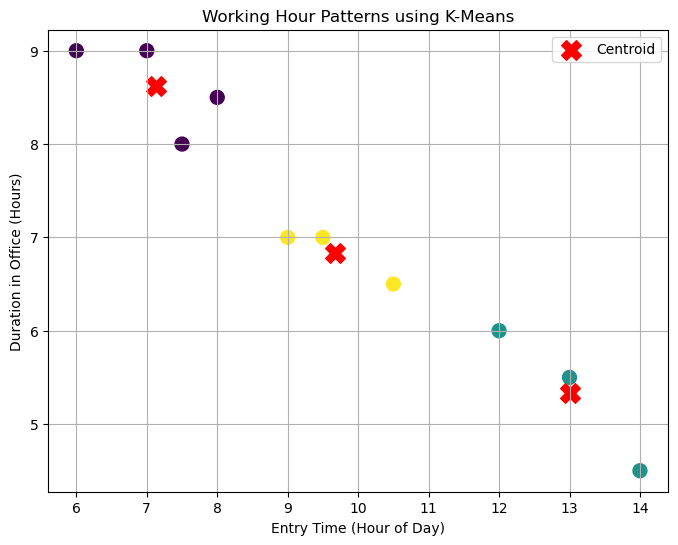

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df['EntryTime'], df['Duration'], c=df['Cluster'],s=100)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200,c='red',label='Centroid')
plt.xlabel('Entry Time (Hour of Day)')
plt.ylabel('Duration in Office (Hours)')
plt.title('Working Hour Patterns using K-Means')
plt.legend()
plt.grid(True)
plt.show()

# Lab: Customer Segmentation using K-Means
**Goal**: Group customers by Annual Income and Spending Score.

1. Download customer.csv from https://github.com/salman1256/aimltraining/tree/main/Day-17(II)
2. Load data from customers.csv
3. Show the data 
4. Cluster
5. Interpret each segment like 'High income / high spender' etc.
6. Create Scatter plot for the same

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [15]:
#2, 3  Load dataset
customers = pd.read_csv('customers.csv')
customers.head()

,CustomerID,AnnualIncome,SpendingScore
0,1,15,79
1,2,16,81
2,3,17,76
3,4,18,75
4,5,19,73


In [36]:
# cluster
X = customers[['AnnualIncome','SpendingScore']]
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X)
customers['Cluster'] = labels
centers = kmeans.cluster_centers_
customers.head()
new_cust=pd.DataFrame({'AnnualIncome':[2],'SpendingScore':[30]})
new_label=kmeans.predict(new_cust)[0]
print(new_label)

0


C:\Users\salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


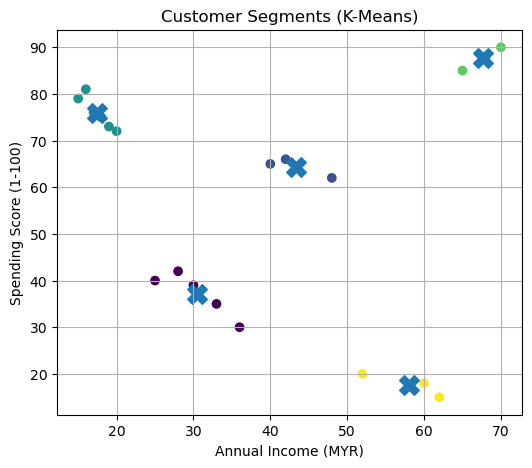

In [29]:
plt.figure(figsize=(6,5))
plt.scatter(customers['AnnualIncome'], customers['SpendingScore'], c=customers['Cluster'])
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
plt.xlabel('Annual Income (MYR)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (K-Means)')
plt.grid(True)
plt.show()